In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

In [2]:
## Learning
# load data into dataframe
tripdata_df = pd.read_csv('green_tripdata_2021-12.csv')
tripdata_df.head(10)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2021-12-01 00:35:15,2021-12-01 00:42:24,N,1.0,82,82,1.0,0.65,6.0,0.5,0.5,0.0,0.0,NaN,0.3,7.3,2.0,1.0,0.0
1,2,2021-12-01 00:15:54,2021-12-01 00:20:31,N,1.0,236,151,1.0,1.62,6.5,0.5,0.5,1.5,0.0,NaN,0.3,9.3,1.0,1.0,0.0
2,2,2021-12-01 00:33:46,2021-12-01 00:43:29,N,1.0,166,75,1.0,1.95,9.5,0.5,0.5,2.7,0.0,NaN,0.3,13.5,1.0,1.0,0.0
3,1,2021-12-01 00:29:51,2021-12-01 00:35:50,N,1.0,74,75,1.0,1.20,6.5,0.5,0.5,0.0,0.0,NaN,0.3,7.8,4.0,1.0,0.0
4,2,2021-12-01 00:13:06,2021-12-01 00:17:11,N,1.0,82,129,1.0,0.92,5.0,0.5,0.5,0.0,0.0,NaN,0.3,6.3,2.0,1.0,0.0
5,2,2021-12-01 00:03:58,2021-12-01 00:22:27,N,1.0,82,73,1.0,7.26,23.0,0.5,0.5,0.0,0.0,NaN,0.3,24.3,2.0,1.0,0.0
6,2,2021-12-01 00:30:39,2021-12-01 00:37:55,N,1.0,92,56,1.0,2.38,8.5,0.5,0.5,0.0,0.0,NaN,0.3,9.8,2.0,1.0,0.0
7,2,2021-11-30 23:39:06,2021-11-30 23:47:08,N,1.0,75,42,1.0,2.50,9.5,0.5,0.5,0.0,0.0,NaN,0.3,10.8,2.0,1.0,0.0
8,2,2021-12-01 00:09:02,2021-12-01 00:14:57,N,1.0,129,129,1.0,0.85,5.5,0.5,0.5,0.0,0.0,NaN,0.3,6.8,2.0,1.0,0.0
9,2,2021-12-01 00:42:26,2021-12-01 00:47:49,N,1.0,82,83,1.0,0.89,5.5,0.5,0.5,0.0,0.0,NaN,0.3,6.8,2.0,1.0,0.0


In [3]:
# check the type of data
tripdata_df.dtypes

VendorID                   int64
lpep_pickup_datetime      object
lpep_dropoff_datetime     object
store_and_fwd_flag        object
RatecodeID               float64
PULocationID               int64
DOLocationID               int64
passenger_count          float64
trip_distance            float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
ehail_fee                float64
improvement_surcharge    float64
total_amount             float64
payment_type             float64
trip_type                float64
congestion_surcharge     float64
dtype: object

In [4]:
# inspect the dimensons
print('There are {} rows and {} columns.'.format(tripdata_df.shape[0], tripdata_df.shape[1]))

# indicate if the variables have suitable types
tripdata_df.info()

There are 99961 rows and 20 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99961 entries, 0 to 99960
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               99961 non-null  int64  
 1   lpep_pickup_datetime   99961 non-null  object 
 2   lpep_dropoff_datetime  99961 non-null  object 
 3   store_and_fwd_flag     74726 non-null  object 
 4   RatecodeID             74726 non-null  float64
 5   PULocationID           99961 non-null  int64  
 6   DOLocationID           99961 non-null  int64  
 7   passenger_count        74726 non-null  float64
 8   trip_distance          99961 non-null  float64
 9   fare_amount            99961 non-null  float64
 10  extra                  99961 non-null  float64
 11  mta_tax                99961 non-null  float64
 12  tip_amount             99961 non-null  float64
 13  tolls_amount           99961 non-null  float64
 14  ehail_fee        

In [5]:
#check the frequency of null values in each column
frequency = tripdata_df.isnull().sum()
print(frequency)

# count the frequency of missing values in each row
tripdata_df.isnull().sum(axis=1).sort_values(ascending = False)

# handle missing data -- deletion
# delete rows with 4 or more missing variables (in each row)
tripdata_df = tripdata_df[tripdata_df.isnull().sum(axis=1) < 4]
print(tripdata_df.shape)

VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag       25235
RatecodeID               25235
PULocationID                 0
DOLocationID                 0
passenger_count          25235
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                99961
improvement_surcharge        0
total_amount                 0
payment_type             25235
trip_type                25235
congestion_surcharge     25235
dtype: int64
(74726, 20)


In [6]:
# for all passenger_count, the number is 1 which can be account by the number of rows
# so we can define the passenger_count is duplicated
print(tripdata_df["passenger_count"])

# for the row called ehail_fee, all values are null and present nothing.
print(tripdata_df["ehail_fee"])

# for the row called store_and_fwd_flag, all values are null and present nothing.
print(tripdata_df["store_and_fwd_flag"])

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
74721    1.0
74722    1.0
74723    1.0
74724    1.0
74725    1.0
Name: passenger_count, Length: 74726, dtype: float64
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
74721   NaN
74722   NaN
74723   NaN
74724   NaN
74725   NaN
Name: ehail_fee, Length: 74726, dtype: float64
0        N
1        N
2        N
3        N
4        N
        ..
74721    N
74722    N
74723    N
74724    N
74725    N
Name: store_and_fwd_flag, Length: 74726, dtype: object


In [7]:
# remove any duplicate rows
data = pd.DataFrame(tripdata_df)
data.drop(data[['store_and_fwd_flag', 'passenger_count', 'ehail_fee']], axis=1, inplace=True)

# convert the inappropriate types of data
data["lpep_pickup_datetime"] = pd.to_datetime(data["lpep_pickup_datetime"])
data["lpep_dropoff_datetime"] = pd.to_datetime(data["lpep_dropoff_datetime"])
data['RatecodeID'] = data['RatecodeID'].astype(int)
data['payment_type'] = data['payment_type'].astype(int)
data['trip_type'] = data['trip_type'].astype(int)

# Handle wrong data -- tips and total cost cannot be negative
data = data[(data['tip_amount'] >= 0) & (data['total_amount'] >= 0) & (data['trip_distance'] > 0) 
            & (data['extra'] >= 0) & (data['mta_tax'] != 0.5) & (data['tolls_amount'] >= 0)]

data.dtypes

VendorID                          int64
lpep_pickup_datetime     datetime64[ns]
lpep_dropoff_datetime    datetime64[ns]
RatecodeID                        int64
PULocationID                      int64
DOLocationID                      int64
trip_distance                   float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
payment_type                      int64
trip_type                         int64
congestion_surcharge            float64
dtype: object

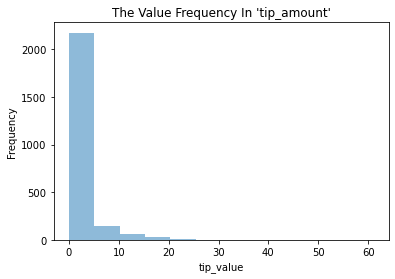

In [8]:
# Visualize 
data['tip_amount'].plot.hist(bins=12, alpha=0.5)
plt.title("The Value Frequency In 'tip_amount'")
plt.xlabel("tip_value")
plt.show()

In [9]:
## Approaching
# Partition the data into train/test split.
# Select the required features to build your model based on the insights from your EDA. 
data.corr()

,VendorID,RatecodeID,PULocationID,DOLocationID,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
VendorID,1.000000,0.037470,-0.004420,0.045945,-0.066317,0.071702,-0.030177,-0.086042,-0.000605,-0.028566,0.887613,0.065150,-0.098544,0.092914,0.055032
RatecodeID,0.037470,1.000000,-0.055958,-0.057571,-0.284523,-0.324478,-0.483662,-0.150805,-0.212168,-0.450894,0.010903,-0.357453,0.117791,0.520688,0.039048
PULocationID,-0.004420,-0.055958,1.000000,0.205322,0.031813,0.054850,0.016497,-0.026375,0.003642,-0.000310,0.007975,0.049103,0.058160,0.000751,-0.055851
DOLocationID,0.045945,-0.057571,0.205322,1.000000,0.039536,0.078174,0.032970,0.008291,0.014395,-0.010206,0.039945,0.073819,-0.002322,-0.046067,0.083843
trip_distance,-0.066317,-0.284523,0.031813,0.039536,1.000000,0.370289,0.181869,0.002064,0.214719,0.375612,-0.053317,0.394626,-0.016930,-0.275392,0.063216
fare_amount,0.071702,-0.324478,0.054850,0.078174,0.370289,1.000000,0.230877,-0.002254,0.370160,0.374630,0.085461,0.986839,-0.095338,-0.206879,0.087906
extra,-0.030177,-0.483662,0.016497,0.032970,0.181869,0.230877,1.000000,-0.001797,0.169643,0.208351,0.018732,0.250308,-0.066683,-0.280864,-0.020630
mta_tax,-0.086042,-0.150805,-0.026375,0.008291,0.002064,-0.002254,-0.001797,1.000000,0.023261,-0.004738,-0.095952,0.002810,-0.021736,-0.064464,-0.004735
tip_amount,-0.000605,-0.212168,0.003642,0.014395,0.214719,0.370160,0.169643,0.023261,1.000000,0.311386,0.005905,0.500425,-0.420146,-0.141989,0.109423
tolls_amount,-0.028566,-0.450894,-0.000310,-0.010206,0.375612,0.374630,0.208351,-0.004738,0.311386,1.000000,-0.005471,0.458533,-0.124046,-0.448021,0.084176


The columns 'VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime','RatecodeID', 'PULocationID', and 'DOLocationID' have poor correlations. So when we select the remain columns except 'tip_amount' as the required features.

In [10]:
X   = data[['trip_distance',
       'fare_amount', 'extra', 'mta_tax', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'payment_type', 'trip_type',
       'congestion_surcharge']] #get the input features
y   = data['tip_amount']              #get the target

X_train, X_test, y_train, y_test = train_test_split(X,              #the input features
                                                    y,              #the label
                                                    test_size=0.3,  #set aside 30% of the data as the test set
                                                    random_state=7, #reproduce the results
                                                   )

In [11]:
## Meets
# Build a model that predicts the tip amount.
# Perform by random forest regression model.
rf = RandomForestRegressor(random_state=7)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=7)

In [12]:
# Predict the labels for the test set
y_pred = rf.predict(X_test)

In [13]:
mse = mean_squared_error(y_test, y_pred)

# Evaluate the Predictions
print('The mse of the model is: {}'.format(mse))

The mse of the model is: 4.245692989491754


## Exceeds
The model may not perform well because there are many zero in tip_amount and the tips paid by cards are not collected. Grid-search is used to find the optimal hyperparameters of a model which results in the most 'accurate' predictions. The following steps will show the way to use GridSearch to improve the most accurate prediction.

In [14]:
# Tweak the model: GridSearch 
# Create the parameter grid based on the results of random search 
param_grid = {'n_estimators': [100, 200, 300, 1000]}

# Create a based model
rf = RandomForestRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

In [15]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'n_estimators': [100, 200, 300, 1000]}, verbose=2)

In [16]:
grid_search.best_params_

{'n_estimators': 100}

In [17]:
nTrees = np.arange(1,50,1)
print(nTrees)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]


In [18]:
mseTrain = []
mseTest = []

for i in nTrees:
    rf = RandomForestRegressor(n_estimators=i ,random_state=7)
    rf.fit(X_train, y_train)
    
    y_pred   = rf.predict(X_test)
    mseTrain.append(mean_squared_error(y_train,rf.predict(X_train)))
    mseTest.append(mean_squared_error(y_test, y_pred))

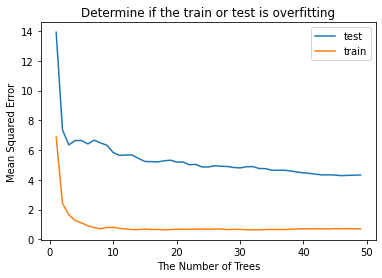

In [19]:
# Visualize the mse of Test and Train
plt.plot(nTrees,mseTest)
plt.plot(nTrees,mseTrain)
plt.title("Determine if the train or test is overfitting")
plt.xlabel("The Number of Trees")
plt.ylabel("Mean Squared Error")
plt.legend(["test",'train'])

The plot shows the train is not overfitting and the test is overfitting.

In [20]:
## Challenge Problem
# present the feature importance
len(rf.feature_importances_)

10

In [21]:
# the feature importance matchs the shape
X_train.shape[1]

10

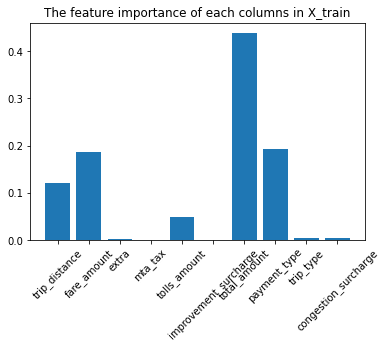

In [22]:
# Visualize the feature importance of each columns
plt.bar(X_train.columns,rf.feature_importances_)
plt.title("The feature importance of each columns in X_train")
plt.xticks(rotation = 45)
plt.show()